<a href="https://colab.research.google.com/github/EmeryWong98/Ever-Up/blob/main/Python/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [8]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [9]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [10]:
new_df = df[['sex', 'salary']]

In [11]:
new_df.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


In [12]:
new_df.shape

(397, 2)

Finding the Median salary for all males

In [13]:
new_df[new_df['sex'] == 'Male']['salary'].median()

108043.0

Finding the Median salary for all females

In [14]:
new_df[new_df['sex'] == 'Female']['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [15]:
mean_males = new_df[new_df['sex'] == 'Male']['salary'].mean()

In [16]:
mean_females = new_df[new_df['sex'] == 'Female']['salary'].mean()

In [17]:
# The difference between mean salaries of male and female
mean_males - mean_females

14088.008738003162

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [18]:
sum(df['yrs.service'] >= 20)

157

In [19]:
df[df['yrs.service'] >= 20]['salary'].mean()

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [20]:
mean_salary_20_more = df[df['yrs.service'] >= 20]['salary'].mean()

In [21]:
mean_salary_20_less = df[df['yrs.service'] < 20]['salary'].mean()

In [22]:
mean_salary_20_more - mean_salary_20_less

14580.151884288745

People who have salary of greater than or equal to 200,000

In [23]:
sum(df['salary'] >= 200000)

3

Only 3 out of 397 employees have the annual salary of greater than or equal to 200,000


# Rename values, subset columns, etc

In [24]:
df.rename(columns = {'Unnamed: 0': 'ID'}, inplace = True)

In [25]:
df.head()

,ID,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


# Create some simple visualizations showing some simple statistics

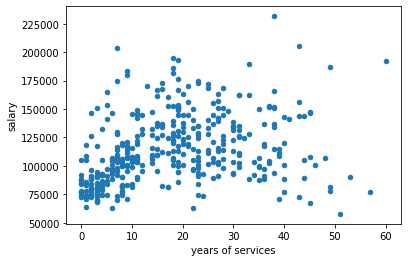

In [26]:
df.plot(kind = 'scatter', x = 'yrs.service', y = 'salary')
plt.xlabel('years of services')
plt.ylabel('salary')

plt.show()

In general, the higher the number of years of service, the higher the salary, especially within 30 years, but not after 30 years, and generally the salary is concentrated between 75,000 and 175,000.

# Draw some conclusions based on the data.  What did you discover?

In [27]:
df.corr()

,ID,yrs.since.phd,yrs.service,salary
ID,1.000000,0.208424,0.166314,0.099583
yrs.since.phd,0.208424,1.000000,0.909649,0.419231
yrs.service,0.166314,0.909649,1.000000,0.334745
salary,0.099583,0.419231,0.334745,1.000000


In [28]:
df.corr() > 0.9

,ID,yrs.since.phd,yrs.service,salary
ID,True,False,False,False
yrs.since.phd,False,True,True,False
yrs.service,False,True,True,False
salary,False,False,False,True


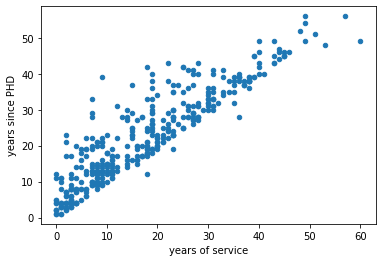

In [29]:
df.plot(kind = 'scatter', x = 'yrs.service', y ='yrs.since.phd')
plt.xlabel('years of service')
plt.ylabel('years since PHD')

plt.show()

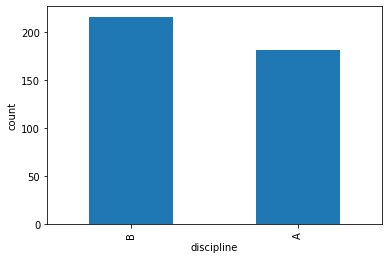

In [30]:
df['discipline'].value_counts().plot(kind = 'bar')
plt.xlabel('discipline')
plt.ylabel('count')

plt.show()

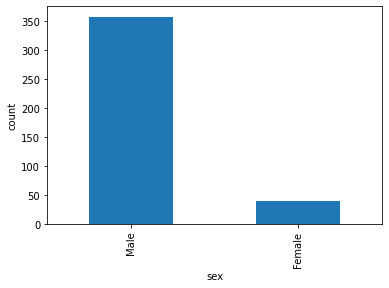

In [31]:
df['sex'].value_counts().plot(kind = 'bar')
plt.xlabel('sex')
plt.ylabel('count')

plt.show()

Based on the analysis performed above, the conclusions are as follows:
1. The number of professors in B and A disciplines are relatively even, but there is a serious imbalance in the ratio in gender, with significantly more male than female.

2. Almost all professors became professors after they got their PhD, and only five professors started before they got their PhD